<a href="https://colab.research.google.com/github/syma-afsha/Machine_Learning/blob/main/Syma_Afsha_Linear_Regression_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Linear Regression using polynomials

## Goals
In this lab, you will:
- learn how to use polynomials to fit more complex models using linear regression.

<a name="toc_40291_2"></a>
# Problem Statement
As we saw in the previous lab, [linear regression](https://www.ibm.com/topics/linear-regression) analysis is used to predict the value of a variable (*y*) based on the value of another variable (*x*). The variable you want to predict is called the dependent variable (*y*). The variable you are using to predict the other variable's value is called the independent variable (*x*).

This form of analysis estimates the coefficients of a linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values.



---



In this lab we are going to see how this algorithm works with a simple example, using the Python library "numpy", especifically the ["polyfit"](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) and the ["poly1d"](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html) functions.

First, we are going to import some libraries and functions that we will use:


*   **Numpy**, that allows us to work with arrays and create the models
*   The **"pyplot"** package from Matplotlib, that will allow us to plot some results

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Then we define some functions that will be useful to plot the results of the models we will create

In [ ]:
# Plot a figure with the data and the regression function
def plot_data(xTrain, yTrain, model, name, xVal = None, yVal = None, validation = False):
  polyline = np.linspace(1.9, 13, 100)

  fig, ax = plt.subplots(figsize=(10, 7))
  plt.scatter(xTrain, yTrain, s=100, c = 'b')
  if validation:
    plt.scatter(xVal, yVal, s=100, c = 'orange')
  plt.rcParams.update({'font.size': 14})

  ax.set_xlabel('years(x)')
  ax.set_ylabel('price(y)')
  ax.set_title('price for used cars '+ name)

  ax.axis([1.5, 13, 0, 12000])
  ax.grid(True);
  plt.plot(polyline, model(polyline))


## DATA

In this case, we are presented with a simple problem: the price of used cars along the years. Cars are then presumed to be in a linear relationship with how old it is. We have two datasets:


*   Training data, where **xTrain** contains a single feature (car age) for the training dataset, and **yTrain** contains the ground truth labels of these samples, in this case the price of the car. This dataset will be used to fit the models we will train.
*   Validation data, where **xVal** contains the features of the validation dataset, so, the age of each car, and **yVal** contains the ground truth of these samples, in this case the price of the car. This dataset will be used to verify how accurate the fitted models are, using data that has not been used to train the model.

In [ ]:
# Training data
xTrain = np.array([2, 2.5, 2.75, 3, 3.5, 4, 4.5, 5, 5.5, 6, 7, 8, 9, 9.5, 10, 11, 12, 12.5])
# Labels of the training data
yTrain = np.array([11200, 9950, 10750, 9400, 7500, 6300, 5800, 5700, 4200, 4400, 4200, 3800, 3950, 2700, 2100, 2500, 1850, 1800])

# Validation data
xVal = np.array([2.5, 2.75, 3.5, 4, 5, 5.75, 6.5, 7, 8, 8.5, 9, 10.5, 12, 9.5])
# Labels of the validation data
yVal = np.array([10250, 8750, 8500, 5800, 6200, 5000, 4500, 3500, 3250, 3000, 2250, 2500, 2250, 3800])

First, we are going to plot the training data and analize it.

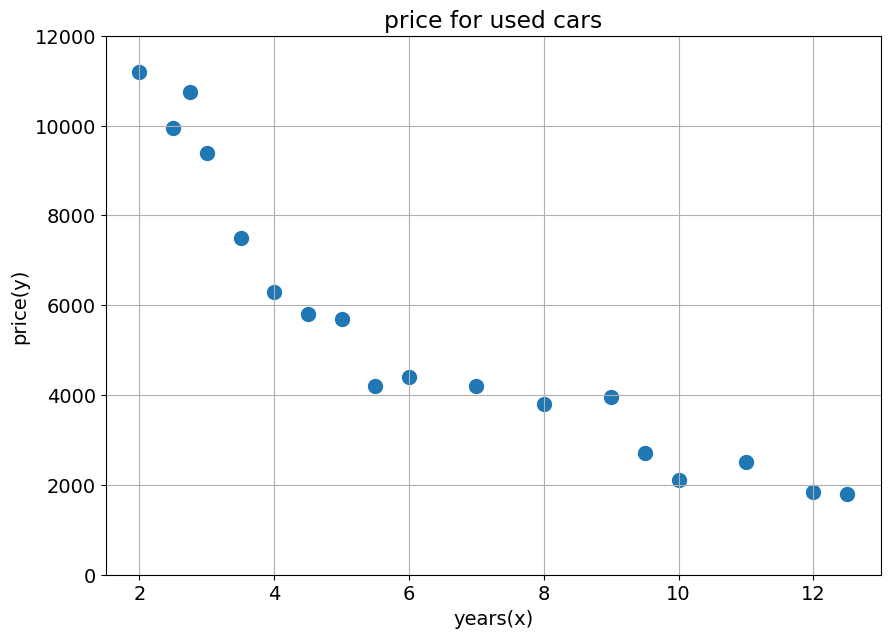

In [ ]:
# Plot the training data
fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(xTrain, yTrain, s=100)

plt.rcParams.update({'font.size': 14})

ax.set_xlabel('years(x)')
ax.set_ylabel('price(y)')
ax.set_title('price for used cars')

ax.axis([1.5, 13, 0, 12000])
ax.grid(True)

<a name="toc_40291_2.2"></a>
##  Modeling Linear Regressions
To start, we have an example of how to create a basic regressions function with dregree = 1 using the ["polyfit"](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) and the ["poly1d"](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html) functions. Next, the mean error percentage is computed for the train data and the fitted function and the training data is plotted.

Mean error train:
24.58


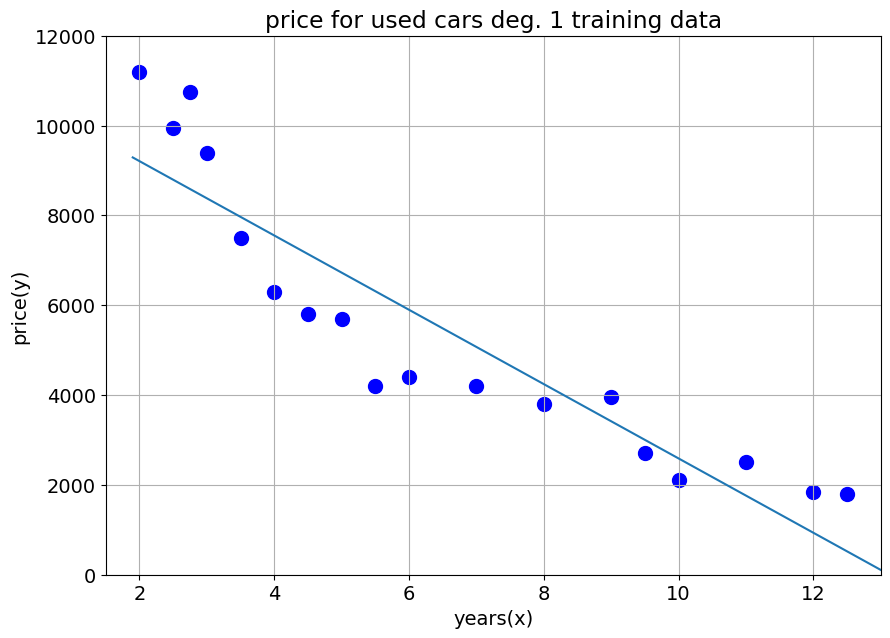

In [ ]:
#polynomial fit with degree = 1
modeld1 = np.poly1d(np.polyfit(xTrain, yTrain, 1))
#mean error percentatge is computed for the train data
print("Mean error train:")
per1 = np.sum(np.abs(modeld1(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(round(per1,2))
# plot model and training data
plot_data(xTrain, yTrain, modeld1, "deg. 1 training data")


In [ ]:
per1

24.58073942307833

Sometimes a higher degree function give better results to our problems.

Define a new model with a polynomial function of degrees 2 and 4, and compare the results with the linear ones. **Which one is better?**

Mean error train deg. 2:
14.207545998417812
14.21
Mean error train deg. 4:
8.809393580201247
8.81


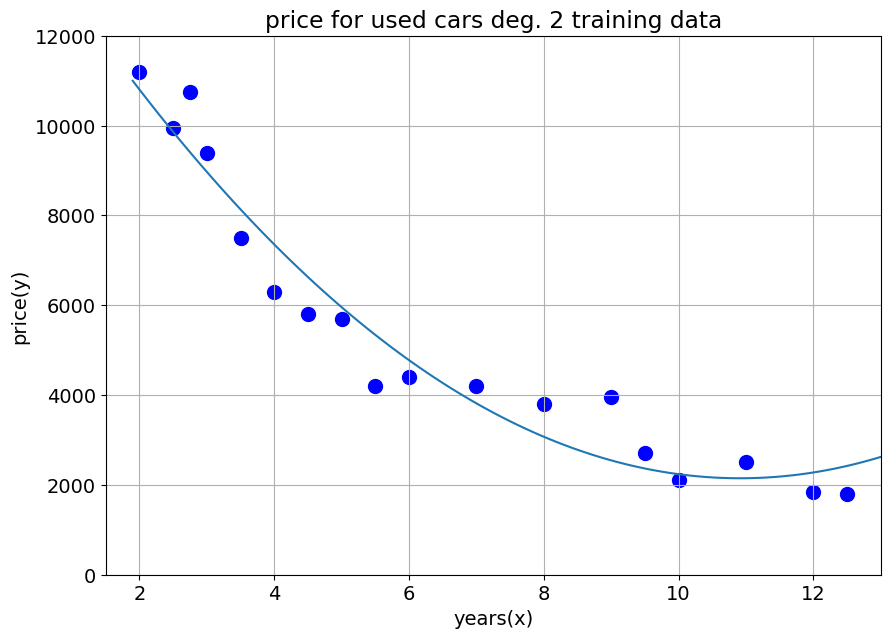

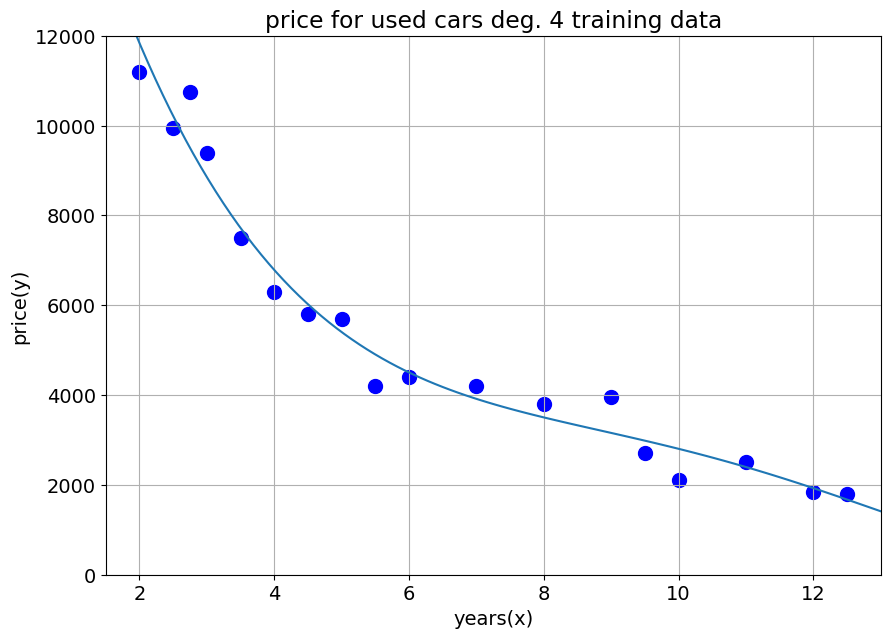

In [ ]:
# TO DO: Define a new model with a polynomial function of degrees 2 and 4, and compare the results with the linear ones.

#polynomial fit with degree = 2
modeld2 = np.poly1d(np.polyfit(xTrain,yTrain,2))
#mean error percentatge is computed for the train data
print("Mean error train deg. 2:")
per2= np.sum(np.abs(modeld2(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(per2)
print(round(per2,2))
# plot model and training data
plot_data(xTrain, yTrain, modeld2, "deg. 2 training data")

#polynomial fit with degree = 4
modeld4 = np.poly1d(np.polyfit(xTrain,yTrain,4))
#mean error percentatge is computed for the train data
print("Mean error train deg. 4:")
per4 = np.sum(np.abs(modeld4(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(per4)
print(round(per4,2))
# plot model and training data
plot_data(xTrain, yTrain, modeld4, "deg. 4 training data")

**Answer:** <font color='red'>**The degree of polynomial 4 is better model because the polyline of degree 4 is closure to  most of the training points  than degree of polynomial 2 line. At the same time, the mean error of degree 4 polynomial is smaller value than degree of polynomial 2. We know, the less Mean error, the better the model is.**



As we saw before, we have another dataset called "validation data" that allows us to further check which model is better for us. Compute the mean error percentage for the model with the validation data and compare them with the training data . **Now, which model do you think is better for our data? Is it the same as the one chosen before? Explain why.**

Mean error train model deg 1:
24.58073942307833
24.58
Mean error test model deg 1:
25.17368105669305
25.17
Mean error train model deg 2:
14.207545998417812
14.21
Mean error test model deg 2:
9.982021272220376
9.98
Mean error train model deg 4:
8.809393580201247
8.81
Mean error test model deg 4:
12.30018037115111
12.3


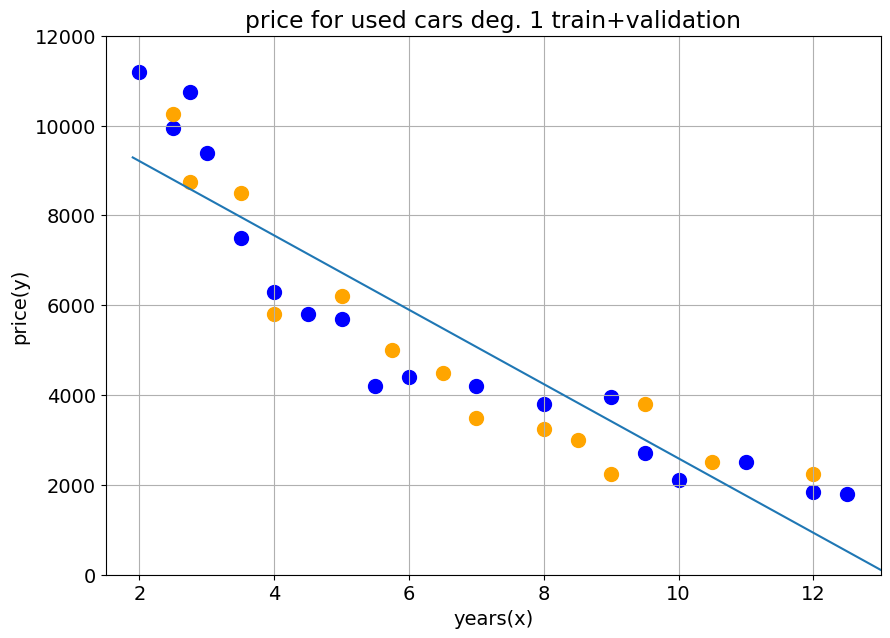

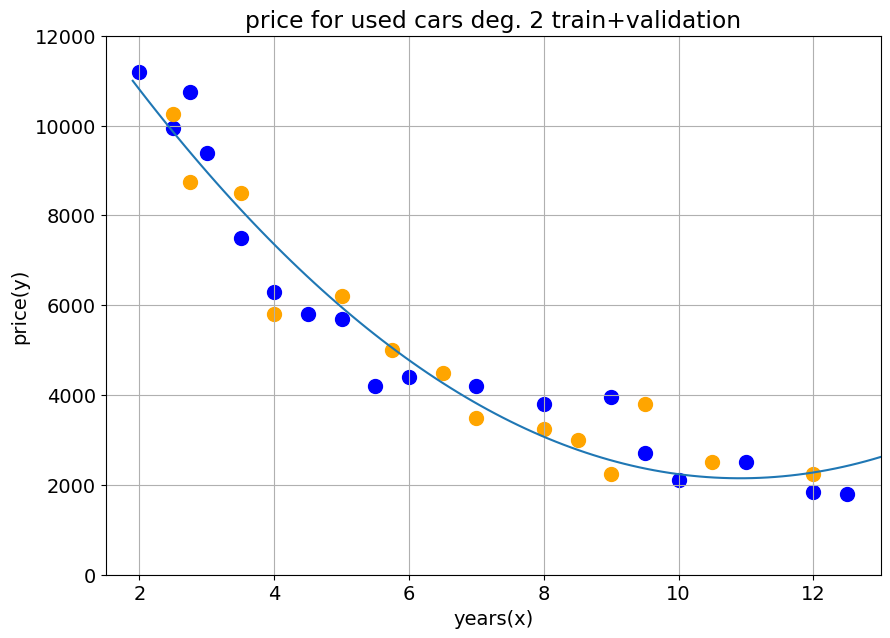

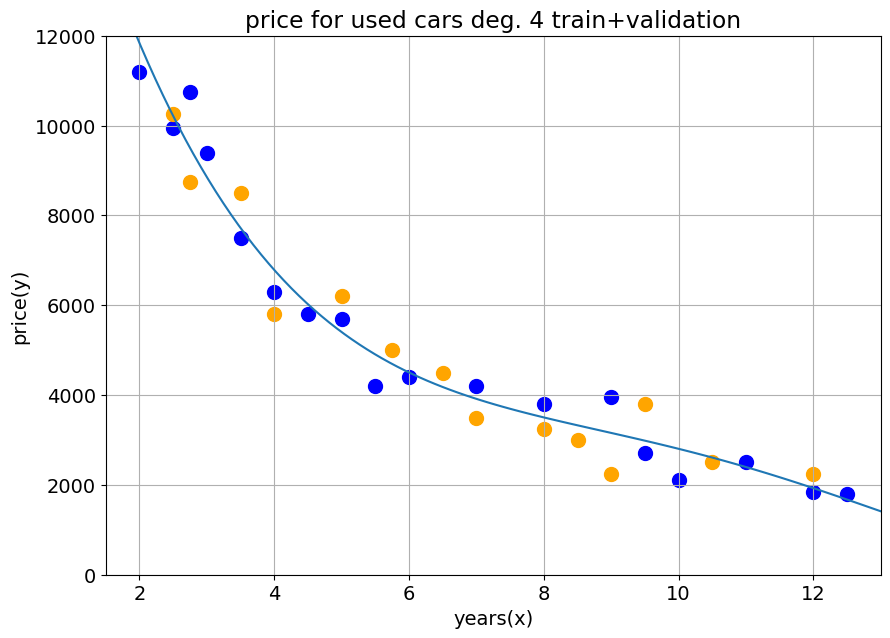

In [ ]:
#mean error percentatge for model deg. 1 is computed for the train and validation data
modeld1= np.poly1d(np.polyfit(xTrain,yTrain,1))
print("Mean error train model deg 1:")

per1_train= np.sum(np.abs(modeld1(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(per1_train)
print(round(per1_train,2))




print("Mean error test model deg 1:")
per1_test= np.sum(np.abs(modeld1(xVal)-yVal)/yVal)/len(yVal)*100
print(per1_test)
print(round(per1_test,2))


# plot model and training data
plot_data(xTrain, yTrain, modeld1, "deg. 1 train+validation", xVal, yVal, True)

#mean error percentatge for model deg. 1 is computed for the train and validation data
modeld2= np.poly1d(np.polyfit(xTrain,yTrain,2))
print("Mean error train model deg 2:")

per2_train= np.sum(np.abs(modeld2(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(per2_train)
print(round(per2_train,2))




print("Mean error test model deg 2:")
per2_test= np.sum(np.abs(modeld2(xVal)-yVal)/yVal)/len(yVal)*100
print(per2_test)
print(round(per2_test,2))


# plot model and training data
plot_data(xTrain, yTrain, modeld2, "deg. 2 train+validation", xVal, yVal, True)

#mean error percentatge for model deg. 1 is computed for the train and validation data
modeld4= np.poly1d(np.polyfit(xTrain,yTrain,4))
print("Mean error train model deg 4:")

per4_train= np.sum(np.abs(modeld4(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(per4_train)
print(round(per4_train,2))



print("Mean error test model deg 4:")
per4_test= np.sum(np.abs(modeld4(xVal)-yVal)/yVal)/len(yVal)*100
print(per4_test)
print(round(per4_test,2))


# plot model and training data
plot_data(xTrain, yTrain, modeld4, "deg. 4 train+validation", xVal, yVal, True)

Answer: <font color='red'> For tarining data, the mean error becomes smaller when iterating degree of polynomial. The less value comes in degree of polynomial 4. On the other hand, for validation data, the mean error becomes smaller until degree of polynomial 2 but then mean error increases in degree of polynomial 4. However, the changes of the variance of the training data and validation data is not much. So the previous one which is degree of polynomial 4 is better model.

In reality, when running Gradient Descent, your loss is computed as the Mean Squared Error.
1. Import the function "mean_squared_error" from the library "sklearn.metrics"
2. Create a FOR loop that trains models from degree 1 to degree 14
3. Plot the model at every iteration, and compute de MSE for train and for validation. Store them in two vectors "TrainMSE" and "ValMSE".


[1497428.8455250978, 518522.3091726209, 266259.01944789133, 259139.950578145, 204363.55901135903, 155890.84592566095, 155740.1667721578, 155028.38488484273, 144365.93399105637, 103349.15741455804, 99196.83369696417, 50188.22267959493, 35298.72199071123, 30678.245619213158]
[1139035.1781437532, 406056.4255161988, 350732.4718125762, 351929.99004613905, 490565.5840571059, 559819.6906721198, 555035.8328522575, 551504.126946234, 623854.3729493963, 686784.5470355384, 683898.1535111947, 794175.4795480983, 859041.1620981051, 911188.8054096492]


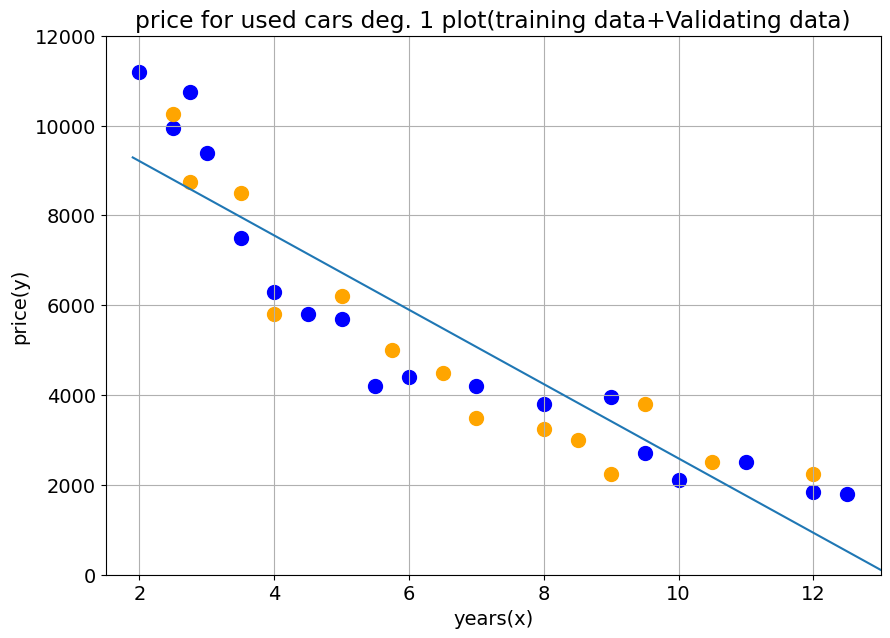

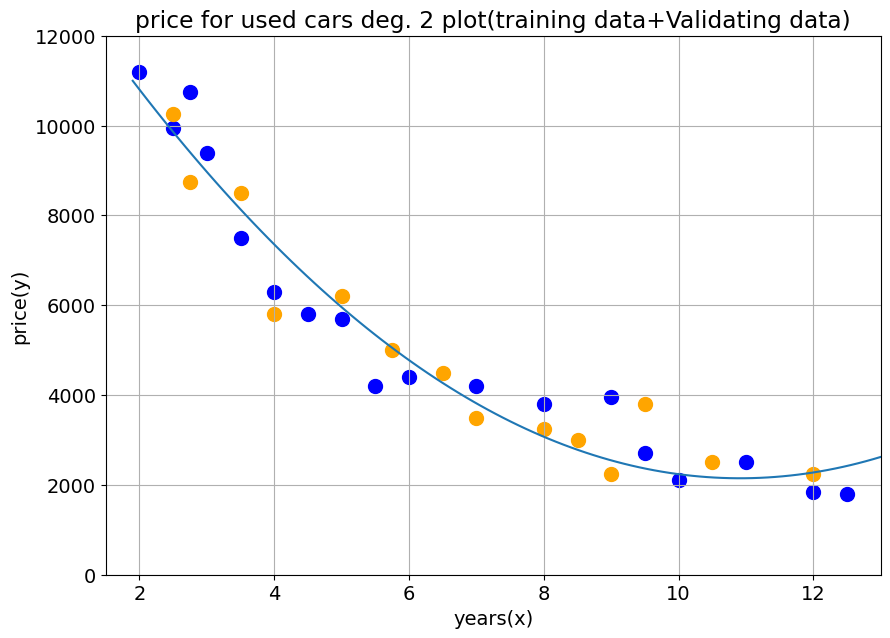

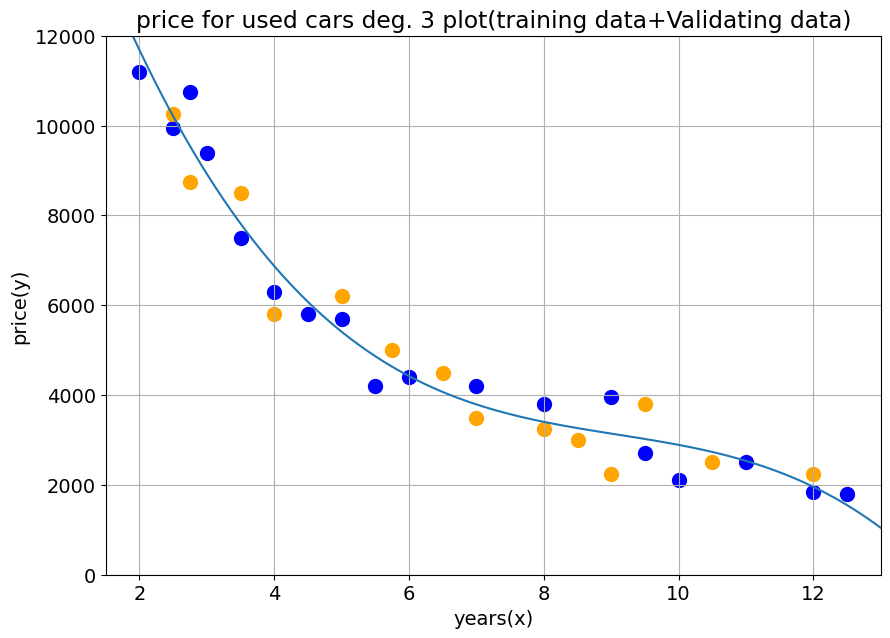

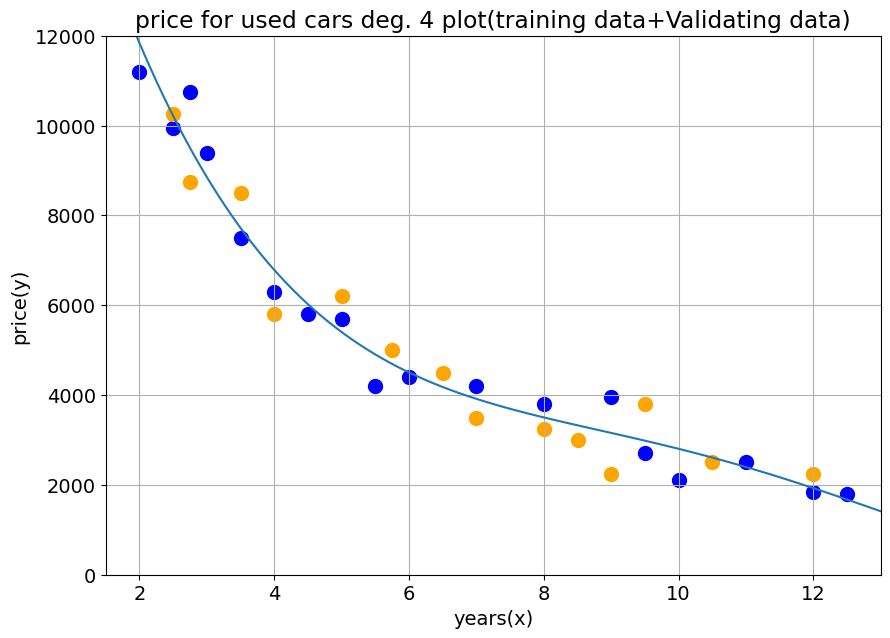

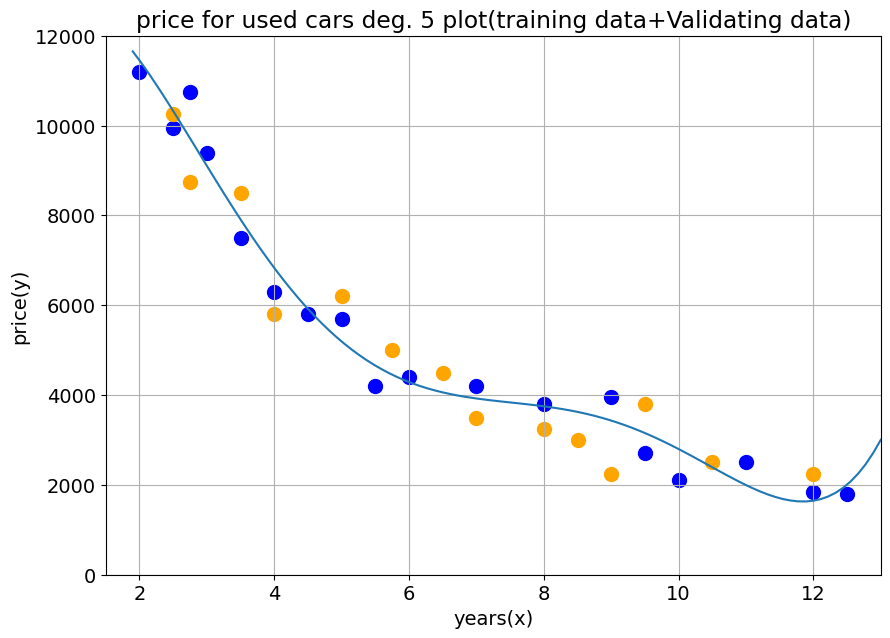

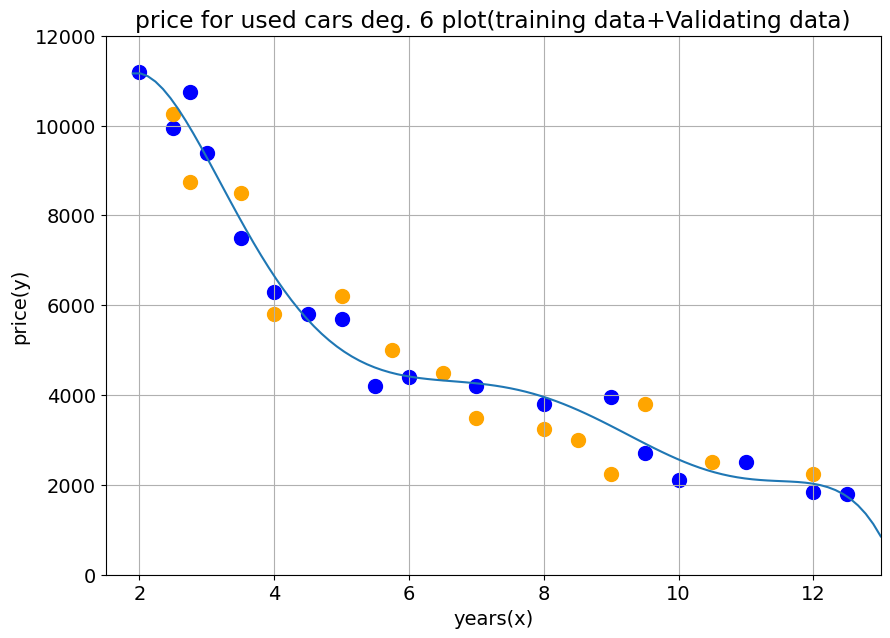

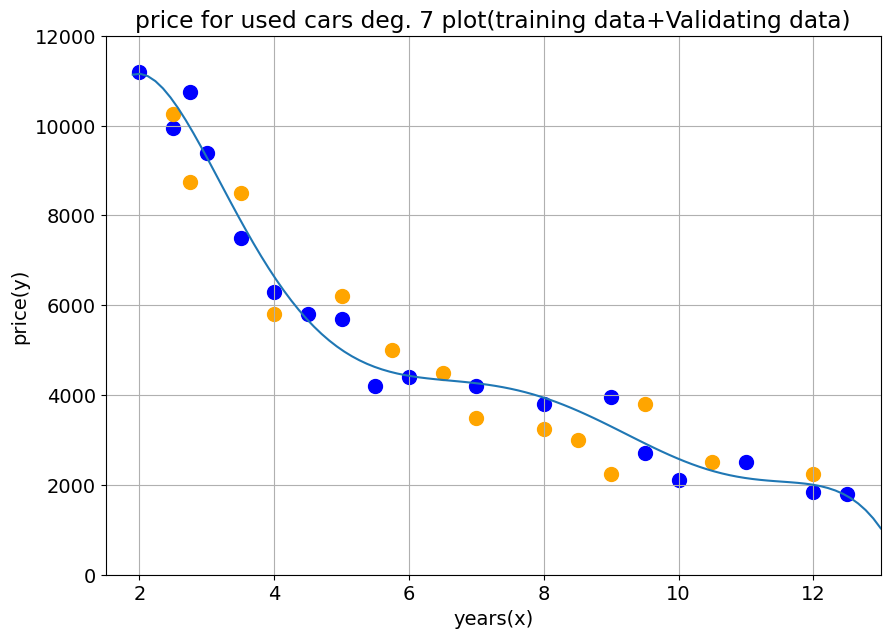

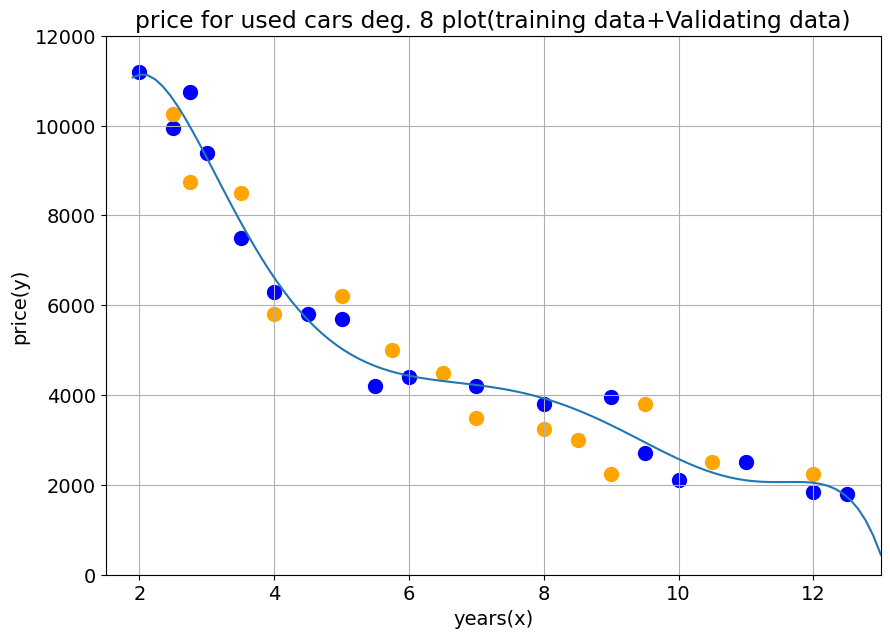

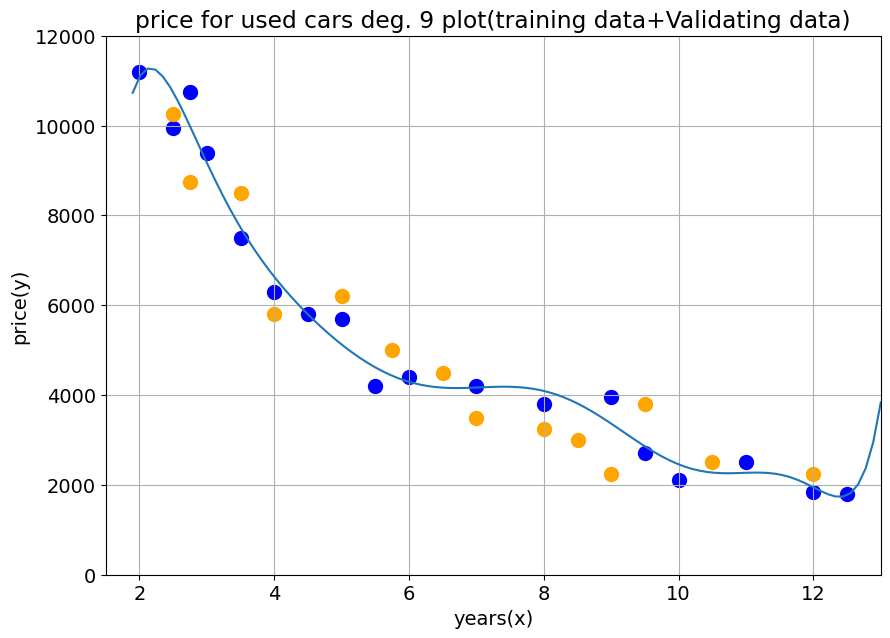

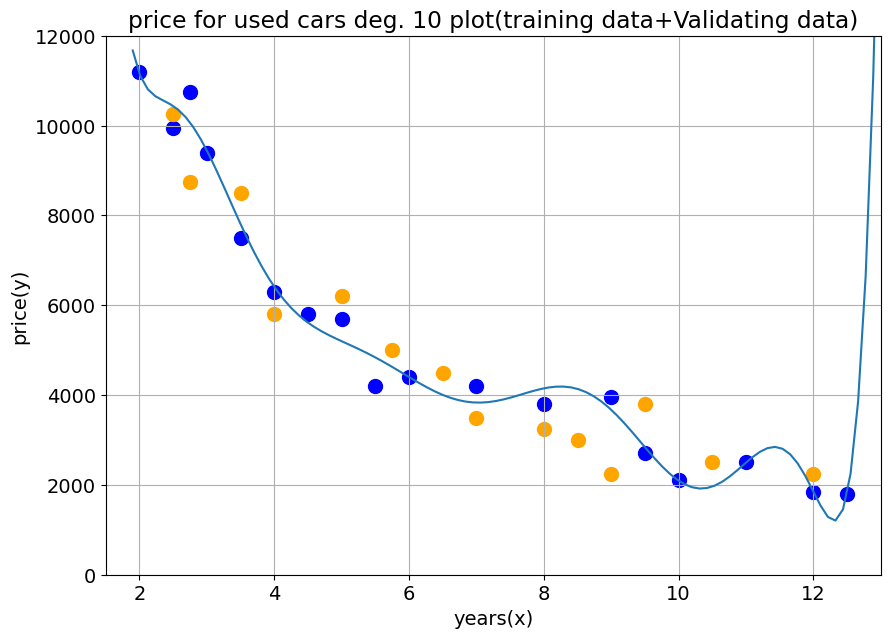

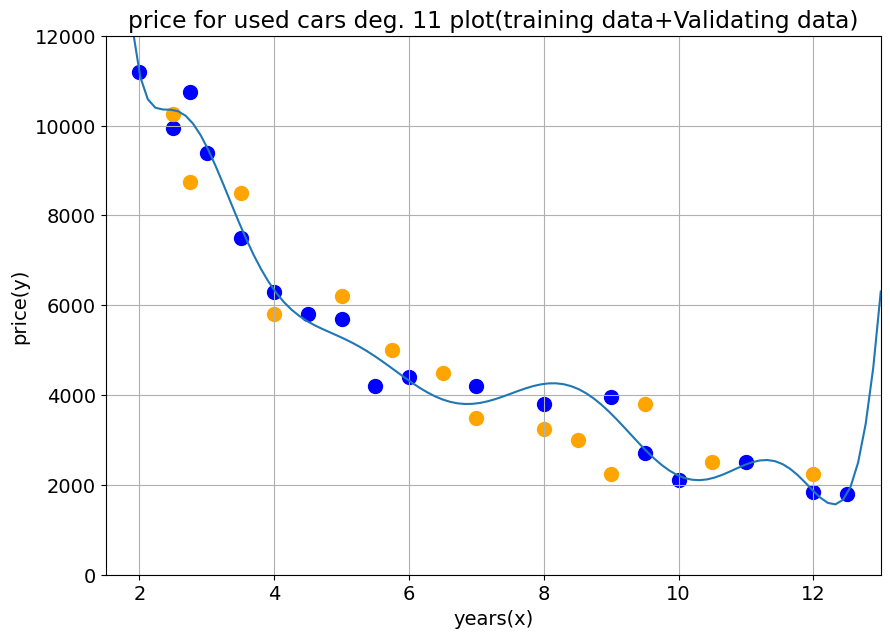

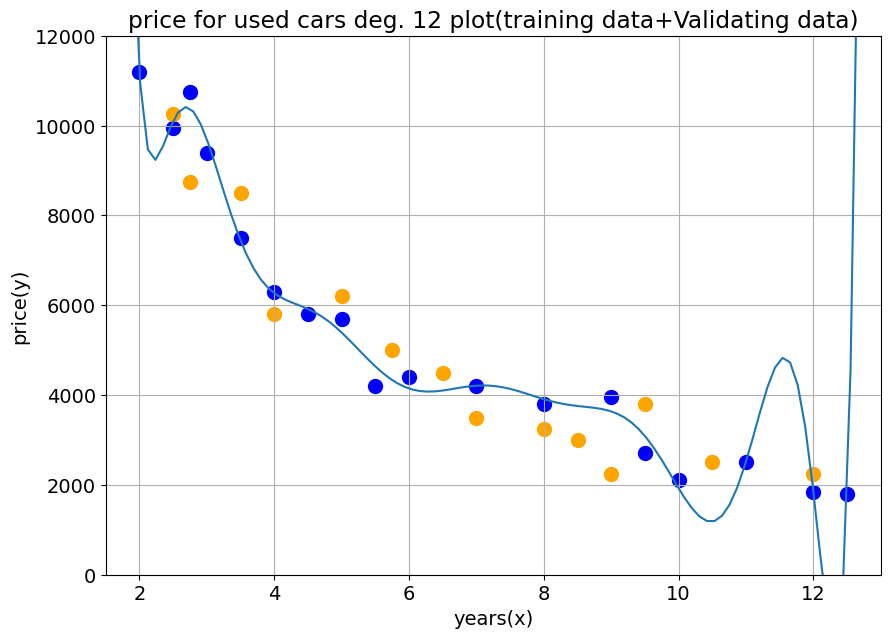

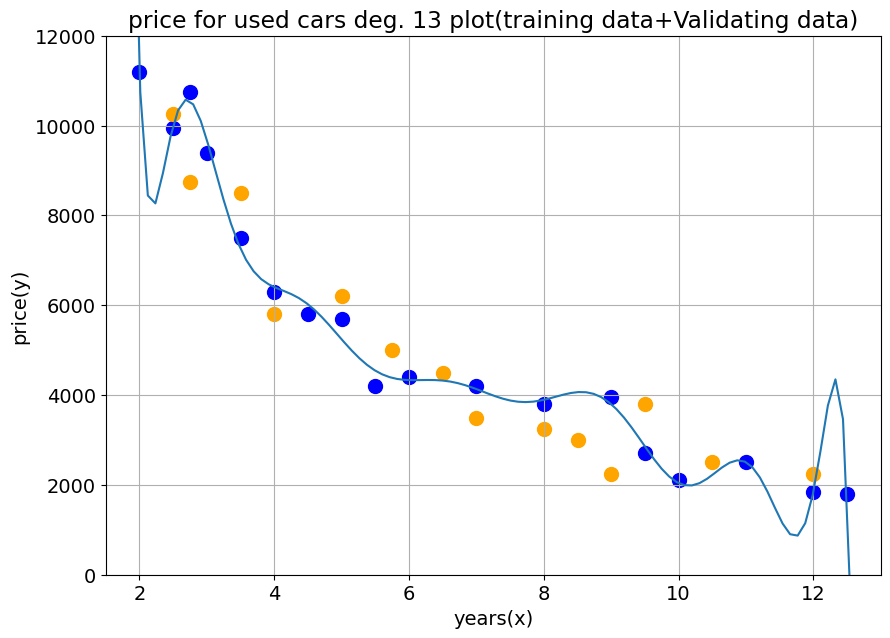

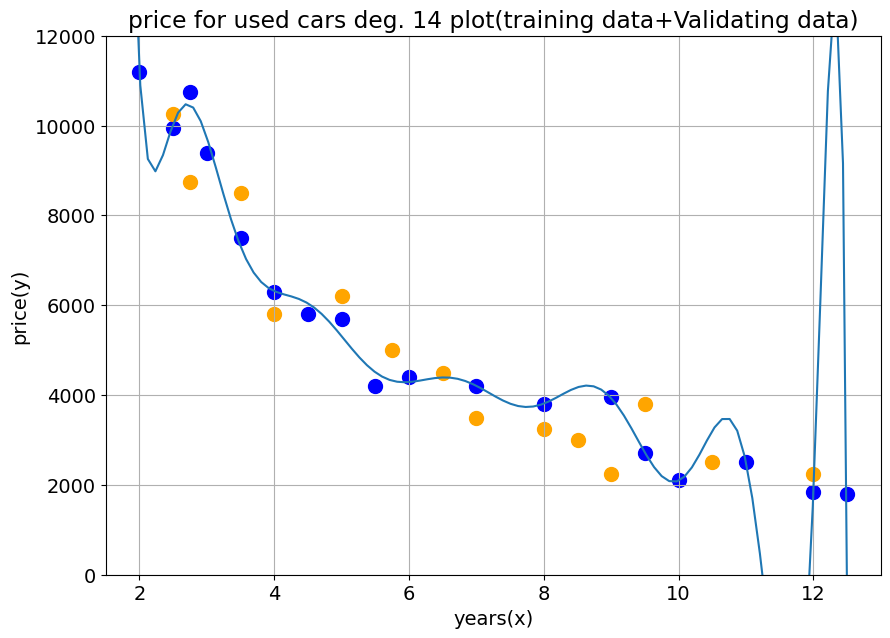

In [ ]:
# Import library
from sklearn.metrics import mean_squared_error
TrainMSE=[]
ValMSE=[]

# For loop
for i in range(1,15):
  # MSE for train
  modeliD= np.poly1d(np.polyfit(xTrain,yTrain,i))
  y_predicted_train=modeliD(xTrain)

  train_mse= mean_squared_error(yTrain, y_predicted_train)
  TrainMSE.append(train_mse)

  # MSE for test
  y_predicted_Val= modeliD(xVal)
  val_mse=mean_squared_error(yVal, y_predicted_Val)
  ValMSE.append(val_mse)
  # plot training and validation plot in every degree of polinomial
  plot_data(xTrain, yTrain, modeliD, "deg."+" "+str(i) + " "+ "plot(training data+Validating data)",xVal, yVal, True)

print(TrainMSE)
print(ValMSE)



In [ ]:
y_predicted_train

array([11197.02518364, 10035.03212585, 10462.10031122,  9726.94206869,
        7309.52519357,  6314.91993684,  6040.89176686,  5308.91781695,
        4507.46942701,  4289.38966663,  4204.36346754,  3809.72425085,
        3930.71141079,  2719.96527731,  2092.41428768,  2500.69318209,
        1849.91357404,  1800.01401265])

In [ ]:
yTrain

array([11200,  9950, 10750,  9400,  7500,  6300,  5800,  5700,  4200,
        4400,  4200,  3800,  3950,  2700,  2100,  2500,  1850,  1800])

In [ ]:
y_predicted_Val

array([10035.03212585, 10462.10031122,  7309.52519357,  6314.91993684,
        5308.91781695,  4319.55558411,  4391.87388416,  4204.36346754,
        3809.72425085,  4172.93935784,  3930.71141079,  3201.07604772,
        1849.91357404,  2719.96527731])

In [ ]:
TrainMSE

[1497428.8455250978,
 518522.3091726209,
 266259.01944789133,
 259139.950578145,
 204363.55901135903,
 155890.84592566095,
 155740.1667721578,
 155028.38488484273,
 144365.93399105637,
 103349.15741455804,
 99196.83369696417,
 50188.22267959493,
 35298.72199071123,
 30678.245619213158]

In [ ]:
ValMSE

[1139035.1781437532,
 406056.4255161988,
 350732.4718125762,
 351929.99004613905,
 490565.5840571059,
 559819.6906721198,
 555035.8328522575,
 551504.126946234,
 623854.3729493963,
 686784.5470355384,
 683898.1535111947,
 794175.4795480983,
 859041.1620981051,
 911188.8054096492]

Plot "TrainMSE" and "ValMSE" for every degree of polynomial. **What would be the best model? Explain why**

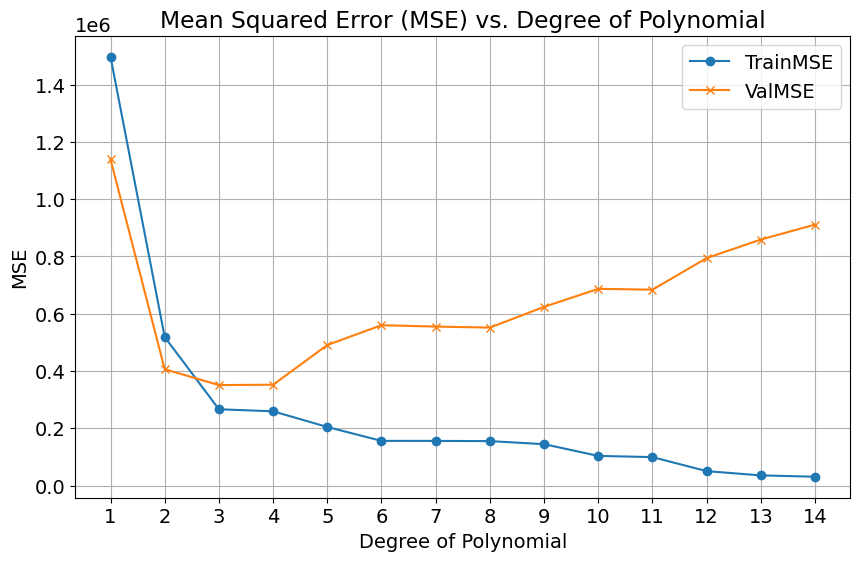

In [ ]:
# Plot TrainMSE and ValMSE to compare the fitted models computed above
Poly_degrees=range(1, 15)
plt.figure(figsize=(10, 6))
plt.plot(Poly_degrees, TrainMSE, label="TrainMSE", marker='o')
plt.plot(Poly_degrees, ValMSE, label="ValMSE", marker='x')
plt.xlabel("Degree of Polynomial")
plt.ylabel("MSE")
plt.title("Mean Squared Error (MSE) vs. Degree of Polynomial")
plt.xticks(Poly_degrees)
plt.legend()
plt.grid()
plt.show()

Answer:  <font color='red'> For first two degree of polynomials, there is high bias (underfitting) is occuring,but for 3rd and 4th degree of polynomials, there is a good fit happened in the model. On the other hand, 5th to 14th degree of polynomials, high variance(overfitting) has occured in the graph.
For Mean Square Error (MSE), 4th degree of polynomial is less than 3rd degree of polynomial. So, the 4th Degree of polynomial model is the best model.

Submit this notebook by the lab deadline, with the cells executed and including your **answers** in the text fields in $\color{red}{\text{red}}$ color.